In [37]:
# Import des bibliothèques nécessaires
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [2]:
# Chargement des données
test=pd.read_csv(r'C:\Users\delll i7 11\Desktop\My_DATA\test.csv')
train=pd.read_csv(r'C:\Users\delll i7 11\Desktop\My_DATA\train.csv')

1-Explore DATA

In [3]:
#train.head()# Affichage des premières lignes du DataFrame train
#train.tail()# Affichage des dernières lignes du DataFrame train
train.sample(7)# Affichage d'un échantillon aléatoire du DataFrame train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S


In [4]:
train.shape# Affichage des dimensions du DataFrame train

(891, 12)

In [5]:
train.info()# Affichage des informations sur le DataFrame train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()# Affichage des statistiques descriptives du DataFrame train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Calcul du nombre de valeurs manquantes par colonne dans le DataFrame train
num=train.isnull().sum()
num[num>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

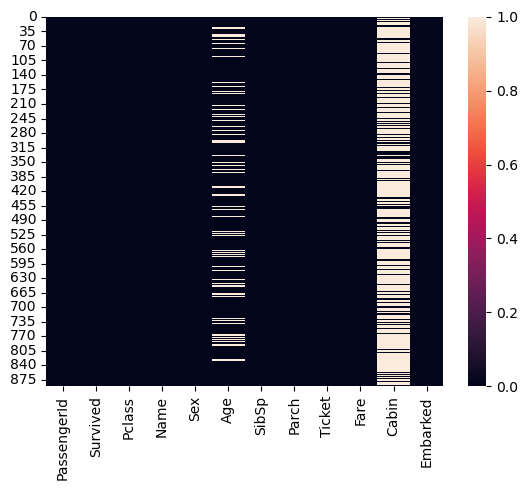

In [8]:
# Affichage d'une heatmap des valeurs manquantes dans le DataFrame train
sns.heatmap(train.isnull())

2-Clean DATA


In [9]:
# Définition d'une fonction pour nettoyer les données
def clean(d):
    d.drop(['Cabin','Name','Embarked','Ticket','Fare'],axis=1,inplace=True)
    d.Age=d.Age.fillna(d.Age.median())
    d.dropna()
    return d

In [10]:
#Nettoyage du DataFrame train
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [11]:
#Nettoyage du DataFrame test
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


<Axes: >

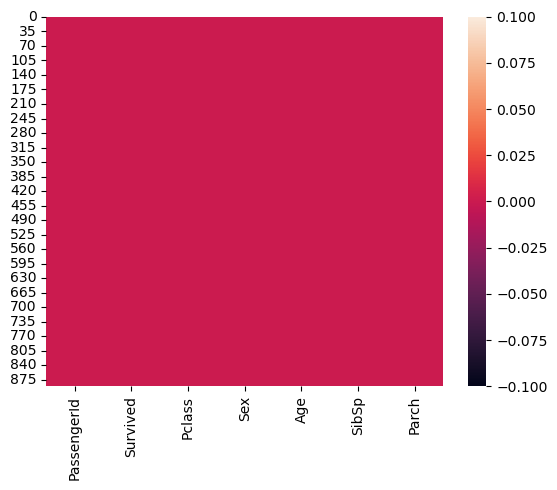

In [12]:
# Affichage d'une heatmap des valeurs manquantes dans le DataFrame 
#train après nettoyage
sns.heatmap(train.isnull())

3-DATA Analysis

In [13]:
# Calcul de la corrélation entre les variables numériques du DataFrame train
co=train.corr(numeric_only=True)

<Axes: >

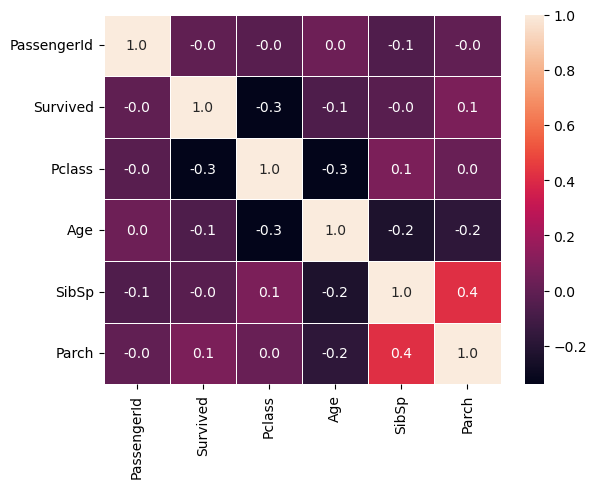

In [14]:
# Affichage d'une heatmap de la corrélation avec annotations
sns.heatmap(co,annot=True,fmt='.1f',linewidth=.5)

In [15]:
# Affichage du décompte des valeurs de la variable cible 'Survived' dans le DataFrame train
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
# Affichage du décompte des valeurs de la variable 'Sex' dans le DataFrame train
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

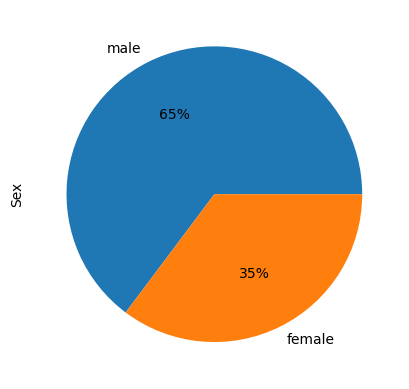

In [17]:
# Tracé d'un diagramme circulaire du décompte des valeurs de la variable 'Sex' dans le DataFrame train
train.Sex.value_counts().plot.pie(autopct='%0.f%%')


<Axes: xlabel='Sex', ylabel='count'>

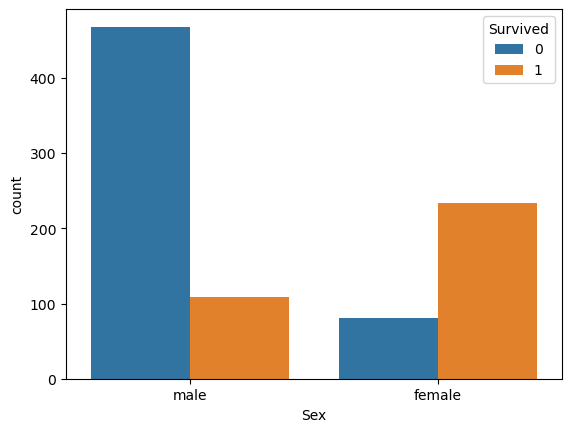

In [18]:
# Tracé d'un diagramme en barres du décompte des valeurs de la variable 'Sex' selon la variable cible 'Survived'
sns.countplot(x=train.Sex, hue=train.Survived)


<Axes: xlabel='Pclass', ylabel='count'>

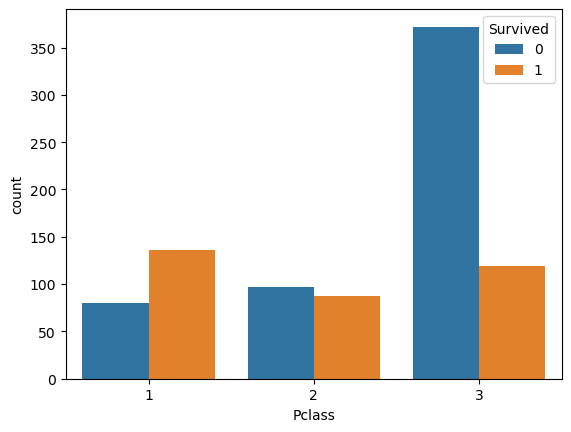

In [19]:
# Tracé d'un diagramme en barres du décompte des valeurs de la variable 'Pclass' selon la variable cible 'Survived
sns.countplot(x=train.Pclass, hue=train.Survived)


<Axes: xlabel='Age', ylabel='Count'>

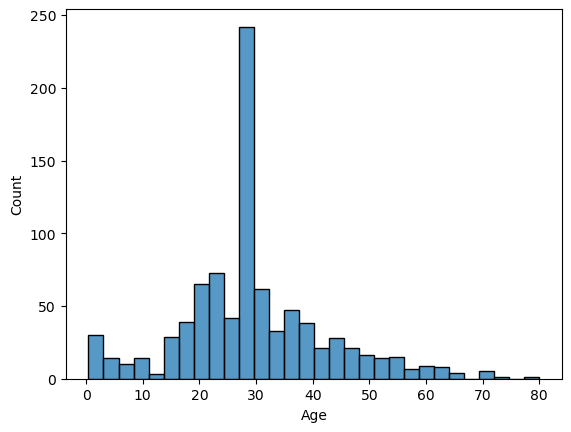

In [20]:
# Tracé d'un histogramme de la variable 'Age' dans le DataFrame train
sns.histplot(train.Age)

# 4-Transform DATA

In [28]:
train.Sex=pd.get_dummies(train.Sex,drop_first=True)
test.Sex=pd.get_dummies(test.Sex,drop_first=True)
# Transformation de la variable 'Sex' en variables indicatrices dans le DataFrame train et test

In [29]:


train.sample(5)



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
754,755,1,2,1,48.0,1,2
773,774,0,3,0,28.0,0,0
802,803,1,1,0,11.0,1,2
741,742,0,1,0,36.0,1,0
435,436,1,1,1,14.0,1,2


5-Create Model

In [25]:
accuracies=[] 

In [30]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [31]:
# Séparation des données d'entraînement et de test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)


In [32]:
# Définition d'une fonction pour entraîner et évaluer un modèle
def all(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    print('Accuracy is : ',accuracy)
    accuracies.append(accuracy)

In [43]:
# Instanciation des différents modèles d'apprentissage automatique
Algorithm=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifie','KNeighborsClassifier',
          'GaussianNB','SVC']

# Application de la fonction aux différents modèles

In [33]:
model1=LogisticRegression(max_iter=100)
all(model1)

Accuracy is :  0.7932960893854749


C:\Users\delll i7 11\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
model2=RandomForestClassifier()
all(model2)

Accuracy is :  0.8156424581005587


In [35]:
model3=GradientBoostingClassifier()
all(model3)

Accuracy is :  0.776536312849162


In [38]:
model4=DecisionTreeClassifier()
all(model4)

Accuracy is :  0.770949720670391


In [39]:
model5= KNeighborsClassifier()
all(model5)

Accuracy is :  0.5195530726256983


In [40]:
model6=GaussianNB()
all(model6)

Accuracy is :  0.770949720670391


In [41]:
model7=SVC()
all(model7)

Accuracy is :  0.5642458100558659


In [44]:
new=pd.DataFrame({'Algorithm':Algorithm,'Score':accuracies})
new

,Algorithm,Score
0,LogisticRegression,0.793296
1,RandomForestClassifier,0.815642
2,GradientBoostingClassifier,0.776536
3,DecisionTreeClassifie,0.770950
4,KNeighborsClassifier,0.519553
5,GaussianNB,0.770950
6,SVC,0.564246


Best Algorithm : GradientBoostingClassifier

# Création d'un DataFrame pour stocker les scores

In [45]:
last_model=GradientBoostingClassifier()
last_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
lpre=last_model.predict(test)

In [ ]:
final=test.PassengerId  

In [ ]:
 df=pd.DataFrame({'PassengerId':final,'Survived':lpre}

In [ ]:
df .to_csv('submission.csv',index=False)